In [1]:
import requests
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = "C:\\Users\\Flore\\Desktop\\EDA_SURF ESKOLA\\turismo_receptor_provincia_pais_ARCHIVO_LIMPIO.csv"
turism = pd.read_csv(path, sep=",")
turism

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2023,1,A Coru�a,Am�rica,Argentina,295.0,"3098,0","10,5"
1,2023,1,A Coru�a,Am�rica,Brasil,498.0,"4084,0","8,2"
2,2023,1,A Coru�a,Am�rica,Canad�,1385.0,"15512,0","11,2"
3,2023,1,A Coru�a,Am�rica,Chile,58.0,"505,0","8,7"
4,2023,1,A Coru�a,Am�rica,Colombia,370.0,"4662,0","12,6"
...,...,...,...,...,...,...,...,...
68083,2024,12,�vila,Europa,Reino Unido,192.0,"1536,0","8,0"
68084,2024,12,�vila,Europa,Ruman�a,135.0,"2160,0","16,0"
68085,2024,12,�vila,Europa,Suecia,296.0,"5180,0","17,5"
68086,2024,12,�vila,Europa,Suiza,98.0,"490,0","5,0"


In [3]:
turism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68088 entries, 0 to 68087
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AÑO                68088 non-null  int64  
 1   MES                68088 non-null  int64  
 2   PROVINCIA_DESTINO  68088 non-null  object 
 3   CONTINENTE_ORIGEN  68088 non-null  object 
 4   PAIS_ORIGEN        68088 non-null  object 
 5   TURISTAS           68088 non-null  float64
 6   PERNOCTACIONES     68088 non-null  object 
 7   ESTANCIA_MEDIA     68088 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.2+ MB


In [4]:
df= pd.DataFrame(turism)

In [5]:
df.tail()

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
68083,2024,12,�vila,Europa,Reino Unido,192.0,"1536,0","8,0"
68084,2024,12,�vila,Europa,Ruman�a,135.0,"2160,0","16,0"
68085,2024,12,�vila,Europa,Suecia,296.0,"5180,0","17,5"
68086,2024,12,�vila,Europa,Suiza,98.0,"490,0","5,0"
68087,2024,12,�vila,�frica,Marruecos,145.0,"1189,0","8,2"


In [6]:
filtro = df[df["AÑO"]>=2024]
turistas= pd.DataFrame(filtro)
turistas

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
32735,2024,1,A Coru�a,Am�rica,Argentina,219.0,"2365,0","10,8"
32736,2024,1,A Coru�a,Am�rica,Brasil,462.0,"3142,0","6,8"
32737,2024,1,A Coru�a,Am�rica,Canad�,102.0,"775,0","7,6"
32738,2024,1,A Coru�a,Am�rica,Chile,124.0,"905,0","7,3"
32739,2024,1,A Coru�a,Am�rica,Colombia,451.0,"3788,0","8,4"
...,...,...,...,...,...,...,...,...
68083,2024,12,�vila,Europa,Reino Unido,192.0,"1536,0","8,0"
68084,2024,12,�vila,Europa,Ruman�a,135.0,"2160,0","16,0"
68085,2024,12,�vila,Europa,Suecia,296.0,"5180,0","17,5"
68086,2024,12,�vila,Europa,Suiza,98.0,"490,0","5,0"


In [7]:
continente_origen = filtro["CONTINENTE_ORIGEN"].value_counts()
continente_origen

CONTINENTE_ORIGEN
Europa     18686
Am�rica     6960
Asia        5415
�frica      3742
Ocean�a      550
Name: count, dtype: int64

In [8]:
agrupado= turistas.groupby(["PROVINCIA_DESTINO", "PAIS_ORIGEN"])["TURISTAS"].sum().reset_index()
agrupado

,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
0,A Coru�a,Alemania,69025.0
1,A Coru�a,Andorra,864.0
2,A Coru�a,Arabia Saud�,92.0
3,A Coru�a,Argelia,439.0
4,A Coru�a,Argentina,5738.0
...,...,...,...
3700,�vila,Senegal,69.0
3701,�vila,Suecia,4814.0
3702,�vila,Suiza,2155.0
3703,�vila,Turqu�a,34.0


In [9]:
agrupado_españa= turistas.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum().reset_index()
agrupado_españa

,PAIS_ORIGEN,TURISTAS
0,Albania,30899.0
1,Alemania,13350981.0
2,Andorra,391412.0
3,Angola,3975.0
4,Arabia Saud�,81230.0
...,...,...
137,Uzbekist�n,4589.0
138,Venezuela,146632.0
139,Vietnam,21371.0
140,Zambia,33.0


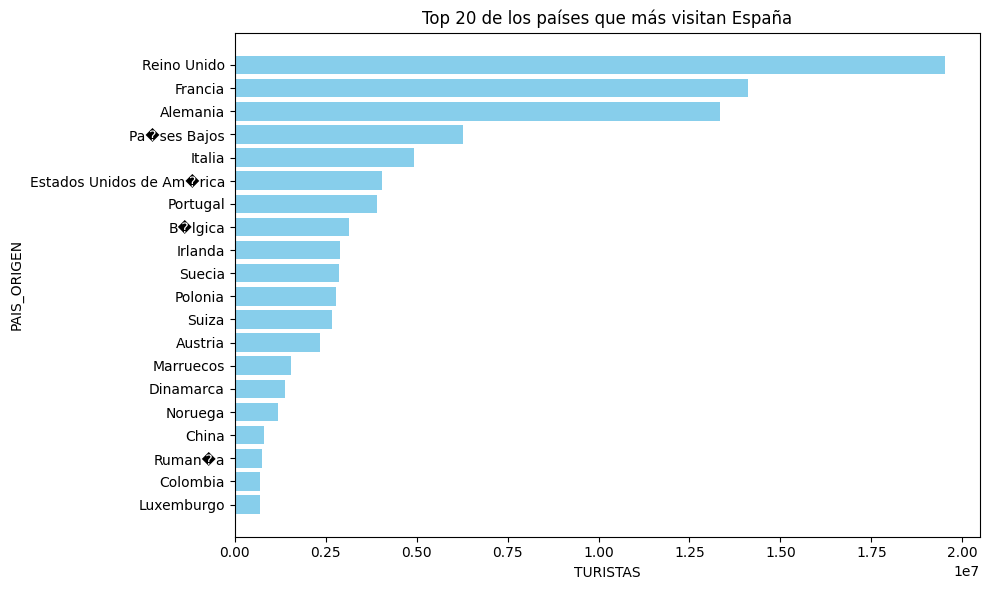

In [11]:
top20_españa = agrupado_españa.sort_values("TURISTAS", ascending=False).head(20)

#Crear una gráfica horizontal
plt.figure(figsize=(10, 6))
plt.barh(top20_españa["PAIS_ORIGEN"], top20_españa["TURISTAS"], color='skyblue')
plt.xlabel("TURISTAS")
plt.ylabel("PAIS_ORIGEN")
plt.title("Top 20 de los países que más visitan España")
plt.gca().invert_yaxis()  #Invertir el eje Y para que el país con más turistas esté arriba
plt.tight_layout()
#plt.yticks(["Francia","Alemania", "Países Bajos", "Reino Unido", "Italia", "Estados Unidos de América", "Suecia", "Bélgica", "Portugal", "Austria", "Suiza", "Polonia", "Irlanda", "Dinamarca", "Luxemburgo", "Colombia", "Marruecos", "China", "Rumanía", "México"])
#Mostrar la gráfica
plt.show()